# Importing the Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

# Loading the Dataset

In [26]:
df = pd.read_csv("StudentsPerformance.csv")

In [27]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Basic Information

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [29]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [30]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [31]:
df.select_dtypes('int').columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

# Encode Categorical values

In [32]:
df_cat = df.select_dtypes('object').columns

In [33]:
df_cat

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [34]:
lb = LabelEncoder()
for col in df_cat:
    df[col] = lb.fit_transform(df[col])

In [35]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


# Visualize Insights

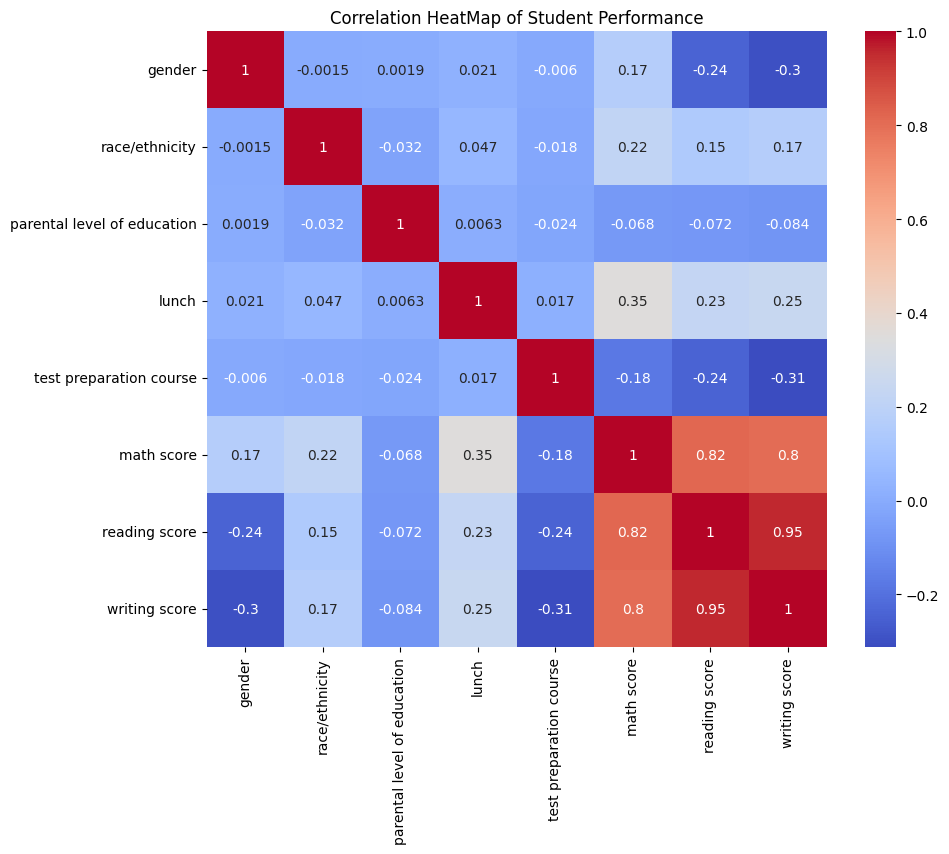

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation HeatMap of Student Performance")
plt.show()

# Taking Average of the Scores

In [37]:
df["avg_score"] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [38]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,0,1,1,1,1,72,72,74,72.666667
1,0,2,4,1,0,69,90,88,82.333333
2,0,1,3,1,1,90,95,93,92.666667
3,1,0,0,0,1,47,57,44,49.333333
4,1,2,4,1,1,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,94.000000
996,1,2,2,0,1,62,55,55,57.333333
997,0,2,2,0,0,59,71,65,65.000000
998,0,3,4,1,0,68,78,77,74.333333


# Splitting the Data

In [39]:
X = df.drop(['math score', 'reading score', 'writing score'], axis=1)
y = df['avg_score']

# Train Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling

In [41]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train

array([[-0.94880848,  0.71030099,  0.29665852,  0.72776144,  0.73178456,
         0.05882982],
       [-0.94880848, -0.15460128, -0.80207674, -1.37407665, -1.36652242,
         0.6488982 ],
       [-0.94880848,  0.71030099,  0.84602615, -1.37407665,  0.73178456,
         1.16815838],
       ...,
       [-0.94880848, -0.15460128, -1.35144437,  0.72776144,  0.73178456,
        -0.86167686],
       [ 1.05395348, -0.15460128,  0.84602615, -1.37407665, -1.36652242,
        -1.26292336],
       [-0.94880848,  0.71030099, -1.35144437,  0.72776144,  0.73178456,
         1.42778847]], shape=(800, 6))

In [43]:
X_test

array([[-0.94880848, -0.15460128, -1.35144437,  0.72776144,  0.73178456,
         1.33337753],
       [-0.94880848, -1.01950355,  0.84602615, -1.37407665, -1.36652242,
        -0.29521121],
       [ 1.05395348,  0.71030099, -0.80207674,  0.72776144,  0.73178456,
         0.48367905],
       ...,
       [-0.94880848, -1.01950355,  0.84602615, -1.37407665,  0.73178456,
         0.62529547],
       [-0.94880848, -0.15460128, -1.35144437,  0.72776144,  0.73178456,
         0.27125444],
       [-0.94880848,  0.71030099,  1.39539378,  0.72776144, -1.36652242,
         0.05882982]], shape=(200, 6))

# Train the Model

In [44]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42)
}

In [45]:
results = {}

# Evaluate the Model

In [47]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = [mae, rmse, r2]

In [48]:
results

{'Linear Regression': [1.4903633882568102e-14,
  np.float64(1.791744496262631e-14),
  1.0],
 'Ridge Regression': [0.0172094321145404,
  np.float64(0.021985802647502484),
  0.9999977450983818],
 'Lasso Regression': [0.08237354633452386,
  np.float64(0.10462774991755407),
  0.9999489334264059],
 'Random Forest': [0.10375000000001122,
  np.float64(0.8760688075462796),
  0.9964197002942675]}

# Performance

In [51]:
results_df = pd.DataFrame(results, index=['MAE', 'RMSE', 'R2'])
print('Model Performance:\n')
print(results_df.T.sort_values(by='R2', ascending=False))

Model Performance:

                            MAE          RMSE        R2
Linear Regression  1.490363e-14  1.791744e-14  1.000000
Ridge Regression   1.720943e-02  2.198580e-02  0.999998
Lasso Regression   8.237355e-02  1.046277e-01  0.999949
Random Forest      1.037500e-01  8.760688e-01  0.996420


# Save the Best Model

In [53]:
best_model_perform = results_df.T.sort_values(by='R2', ascending=False).index[0]
best_model = models[best_model_perform]

In [54]:
best_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [56]:
joblib.dump(best_model,f"{best_model_perform}_SmartStudyPredictor.pkl")
print(f"Saved Best Model as '{best_model_perform}_SmartStudyPredictor.pkl'")

Saved Best Model as 'Linear Regression_SmartStudyPredictor.pkl'


# Visualize Predictions

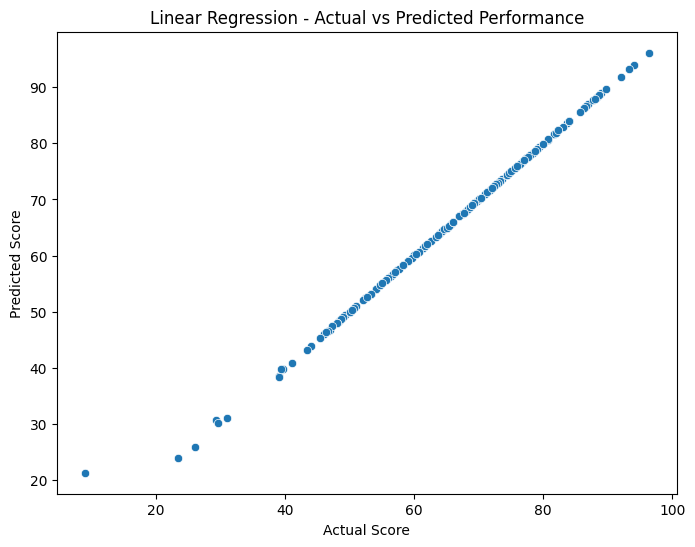

In [61]:
best_pred = best_model.predict(X_test)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title(f"{best_model_perform} - Actual vs Predicted Performance")
plt.show()